In [1]:
from lib.ekyn import *
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [77]:
idx = get_ekyn_ids()
# train_idx,test_idx = train_test_split(get_ekyn_ids(),test_size=.25,random_state=0)
train_idx = get_ekyn_ids()
test_idx = [train_idx[12]]
train_idx.remove(test_idx[0])
print(train_idx,test_idx)
print(len(train_idx),len(test_idx))

['A1-0', 'A1-1', 'A4-0', 'B1-0', 'B3-1', 'C1-0', 'C4-0', 'C4-1', 'D1-0', 'E1-0', 'E2-1', 'E4-0', 'F1-0', 'F1-1', 'F5-1'] ['E4-1']
15 1


In [45]:
df = pd.DataFrame()

for id in train_idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt_robust_scaled(idx=id,condition=condition)
        df[f'{id}_{condition}'] = torch.bincount(y.argmax(axis=1))/len(y)

In [46]:
df = df.T

<Axes: >

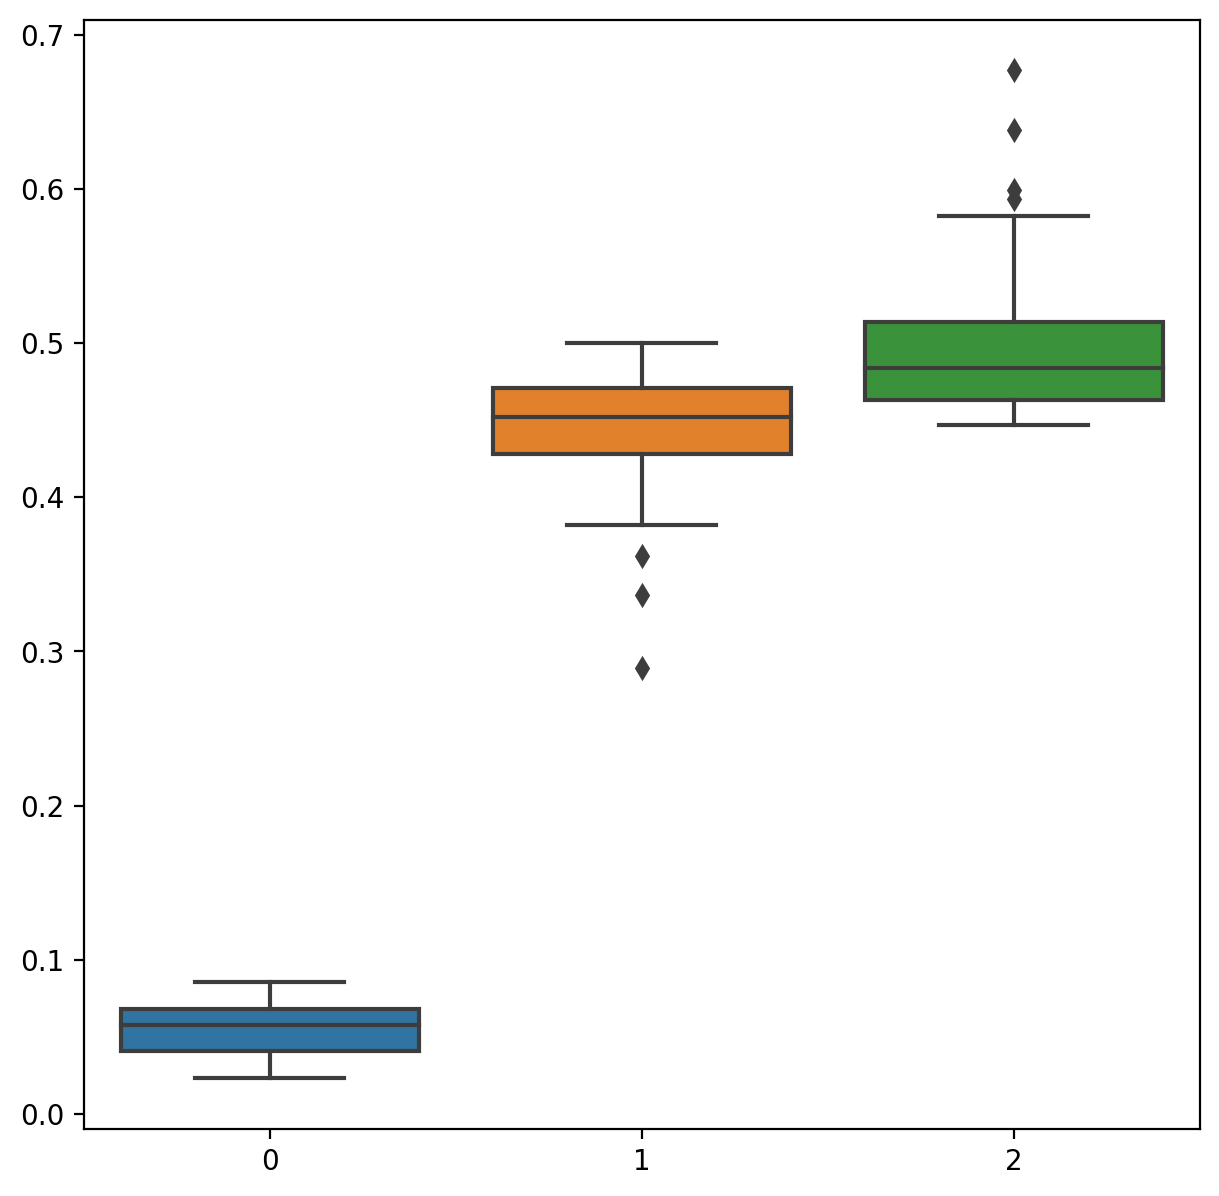

In [70]:
plt.figure(figsize=(7.2,7.2),dpi=200)
sns.boxplot(data=df)

In [57]:
s = df.describe()[1]
w = df.describe()[2]
iqr_s = s['75%'] - s['25%']
iqr_w = w['75%'] - w['25%']
lower_outlier_s = s['25%'] - (1.5*iqr_s)
upper_outlier_w = w['75%'] + (1.5*iqr_w)
lower_outlier_s

0.362586822360754

In [61]:
df[(df[1] < lower_outlier_s) | (df[2] > upper_outlier_w)]

,0,1,2
A4-0_Vehicle,0.033912,0.289120,0.676968
A4-0_PF,0.025694,0.336458,0.637847
B3-1_PF,0.024306,0.382060,0.593634
C4-1_Vehicle,0.038657,0.361806,0.599537


(0.0, 2.0)

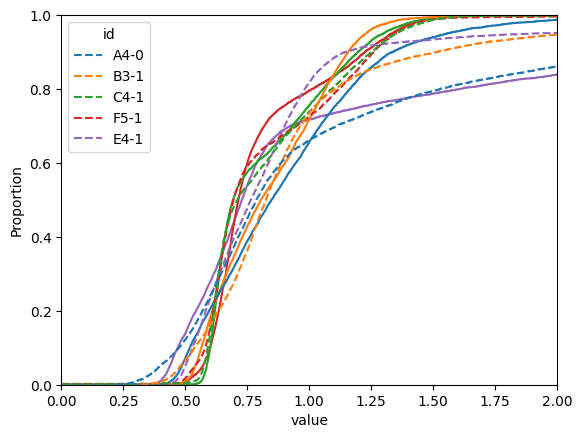

In [78]:
df = pd.DataFrame()

for id in ['A4-0','B3-1','C4-1','F5-1','E4-1']:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt_robust_scaled(idx=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')


plt.xlim([0,2])